# 경사하강법 (Gradient Descent)

In [1]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

## 데이터셋 구축



In [15]:
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

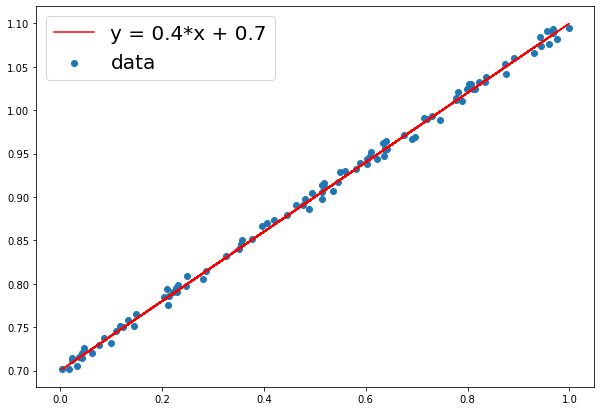

w: 0.4, b: 0.7


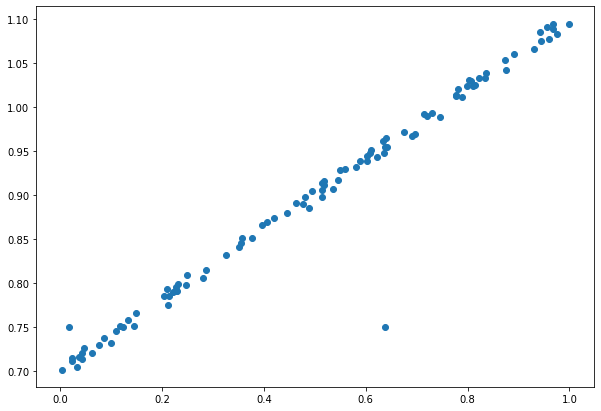

In [16]:
x, y = make_linear(w=0.4, b=0.7, size=100, noise=0.01)
# 임의로 2개의 outlier를 추가해 보도록 하겠습니다.
y[4] = 0.75
y[9] = 0.75

plt.figure(figsize=(10, 7))
plt.scatter(x, y)
plt.show()

## 초기값 (Initializer)과 y_hat (예측, prediction) 함수 정의

w, b 값에 대하여 random한 초기 값을 설정해 줍니다.

In [4]:
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

`y_hat`은 `prediction`은 값 입니다. 즉, 가설함수에서 실제 값 (y)를 뺀 함수를 정의합니다.

In [5]:
y_hat = w * x + b

## 오차(Error) 정의

Loss Function 혹은 Cost Function을 정의 합니다.

Loss (Cost) Function은 예측값인 `y_hat`과 `y`의 차이에 **제곱**으로 정의합니다.

제곱은 오차에 대한 음수 값을 허용하지 않으며, 이는 **Mean Squared Error(MSE)**인 평균 제곱 오차 평가 지표와 관련 있습니다.

In [6]:
error = (y_hat - y) ** 2

## 학습률 (Learning Rate)

한 번 학습할 때 **얼마만큼 가중치(weight)를 업데이트** 해야 하는지 학습 양을 의미합니다.

너무 큰 학습률 (Learning Rate)은 가중치 갱신이 크게 되어 **자칫 Error가 수렴하지 못하고 발산**할 수 있으며,

너무 작은 학습률은 가중치 갱신이 작게 되어 **가중치 갱신이 충분히 되지 않고, 학습이 끝나** 버릴 수 있습니다. 즉 과소 적합되어 있는 상태로 남아 있을 수 있습니다.



## Gradient Descent 구현 (단항식)

In [21]:
# 최대 반복 횟수
num_epoch = 200

# 학습율 (learning_rate)
learning_rate = 0.01

In [22]:
errors = []
# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    y_hat = x * w + b

    error = ((y_hat - y)**2).mean()
    if error < 0.0005:
        break

    w = w - learning_rate * ((y_hat - y) * x).mean()
    b = b - learning_rate * (y_hat - y).mean()
    
    errors.append(error)

    if epoch % 10 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))
    
print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = -0.13508, b = 0.16680 error = 0.67481
10 w = -0.09370, b = 0.24199 error = 0.52446
20 w = -0.05710, b = 0.30815 error = 0.40778
30 w = -0.02471, b = 0.36636 error = 0.31722
40 w = 0.00397, b = 0.41756 error = 0.24693
50 w = 0.02937, b = 0.46258 error = 0.19237
60 w = 0.05190, b = 0.50217 error = 0.15003
70 w = 0.07188, b = 0.53697 error = 0.11716
80 w = 0.08963, b = 0.56756 error = 0.09164
90 w = 0.10540, b = 0.59442 error = 0.07183
100 w = 0.11943, b = 0.61802 error = 0.05644
110 w = 0.13194, b = 0.63873 error = 0.04450
120 w = 0.14309, b = 0.65690 error = 0.03522
130 w = 0.15304, b = 0.67284 error = 0.02801
140 w = 0.16195, b = 0.68681 error = 0.02241
150 w = 0.16994, b = 0.69904 error = 0.01805
160 w = 0.17710, b = 0.70975 error = 0.01467
170 w = 0.18355, b = 0.71911 error = 0.01203
180 w = 0.18935, b = 0.72729 error = 0.00998
190 w = 0.19460, b = 0.73443 error = 0.00838
------------------------------------------------------------
199 w = 0.2, b = 0.7 error = 0.00724


**시각화**

학습 진행(epoch)에 따른 오차를 시각화 합니다.

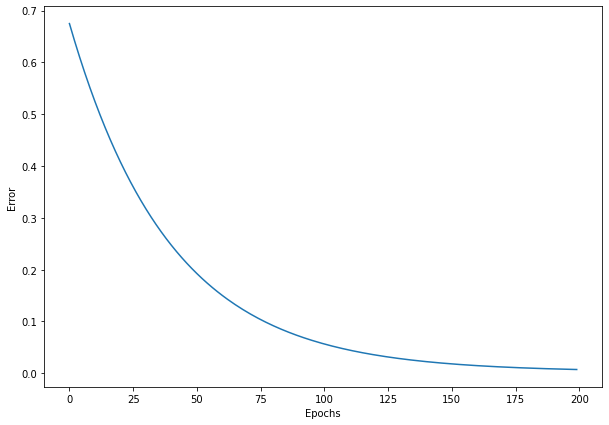

In [23]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

## 다항식

**샘플 데이터**를 생성합니다.

이번에는 Feature Data, 즉 X 값이 여러 개인 다항식의 경우에 대해서도 구해보도록 하겠습니다.

다항식에서는 X의 갯수 만큼, W 갯수도 늘어날 것입니다.

다만, bias (b)의 계수는 1개인 점에 유의해 주세요.

In [24]:
x1 = np.random.rand(100)
x2 = np.random.rand(100)
x3 = np.random.rand(100)

In [25]:
w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
w3 = np.random.uniform(low=-1.0, high=1.0)

b = np.random.uniform(low=-1.0, high=1.0)

**다항식을 정의**합니다.

In [26]:
y = 0.3 * x1 + 0.5 * x2 + 0.7 * x3 + b

## Gradient Descent 구현 (다항식)

In [31]:
errors = []

num_epoch=300
learning_rate=0.01

w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
w3 = np.random.uniform(low=-1.0, high=1.0)

b = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    # 예측값
    y_hat = w1 * x1 + w2 * x2 + w3 * x3 + b

    error = ((y_hat - y)**2).mean()

    # 미분값 적용 (Gradient)
    w1 = w1 - learning_rate * ((y_hat - y) * x1).mean()
    w2 = w2 - learning_rate * ((y_hat - y) * x2).mean()
    w3 = w3 - learning_rate * ((y_hat - y) * x3).mean()

    b = b - learning_rate * (y_hat - y).mean()
    
    errors.append(error)

    if epoch % 10 == 0:
        print("{0:2} w1 = {1:.5f}, w2 = {2:.5f}, w3 = {3:.5f}, b = {4:.5f} error = {5:.5f}".format(epoch, w1, w2, w3, b, error))
    
print("----" * 15)
print("{0:2} w1 = {1:.1f}, w2 = {2:.1f}, w3 = {3:.1f}, b = {4:.1f} error = {5:.5f}".format(epoch, w1, w2, w3, b, error))

 0 w1 = -0.16780, w2 = 0.46919, w3 = 0.16489, b = 0.03282 error = 0.26498
10 w1 = -0.14187, w2 = 0.48815, w3 = 0.19212, b = 0.07574 error = 0.19046
20 w1 = -0.11992, w2 = 0.50368, w3 = 0.21516, b = 0.11130 error = 0.13858
30 w1 = -0.10129, w2 = 0.51633, w3 = 0.23469, b = 0.14072 error = 0.10243
40 w1 = -0.08543, w2 = 0.52660, w3 = 0.25130, b = 0.16502 error = 0.07722
50 w1 = -0.07188, w2 = 0.53487, w3 = 0.26548, b = 0.18506 error = 0.05962
60 w1 = -0.06025, w2 = 0.54149, w3 = 0.27761, b = 0.20154 error = 0.04730
70 w1 = -0.05025, w2 = 0.54674, w3 = 0.28805, b = 0.21506 error = 0.03867
80 w1 = -0.04158, w2 = 0.55084, w3 = 0.29707, b = 0.22611 error = 0.03259
90 w1 = -0.03405, w2 = 0.55399, w3 = 0.30491, b = 0.23510 error = 0.02829
100 w1 = -0.02745, w2 = 0.55635, w3 = 0.31176, b = 0.24238 error = 0.02523
110 w1 = -0.02164, w2 = 0.55805, w3 = 0.31778, b = 0.24823 error = 0.02303
120 w1 = -0.01649, w2 = 0.55921, w3 = 0.32311, b = 0.25288 error = 0.02143
130 w1 = -0.01189, w2 = 0.55991, w3

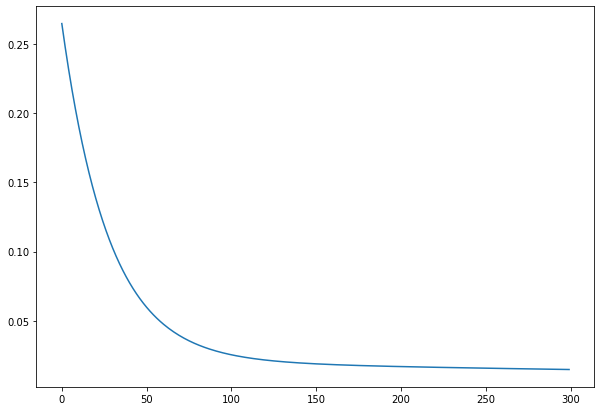

In [32]:
plt.figure(figsize=(10, 7))

plt.plot(errors)